<a href="https://colab.research.google.com/github/lucas-pinto/NUIN443/blob/main/problemSets/NUIN443_ps4_DDMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### PROBLEM SET 4: DRIFT DIFFUSION MODELS #

Here we will code our own vanilla DDM and play with some parameters to illustrate some key concepts about decision making. Have fun! <br>

In [18]:
# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

%matplotlib widget
%matplotlib widget

## Problem 1: DDM ##

**1a**. Write your own function to simulate (not fit) a DDM. <br>
**1b**. Simulate and plot two trials for each of three different values of E (= .01, .10, .20) and decision threshold \\(\beta\\)=50. <br>
**1c**. Simulate 1000 trials with the following parameters: E = 0.06, \\(\beta\\)=20. Plot the distribution of reaction times separately for correct and error trials.  <br>

In [60]:
# write your own simple ddm simulator
# E: strength of sensory evidence
# bound: decision threshold \beta
# c: diffusion noise
# nt: number of data points to simulate
# start_point: value of x at t=0
# E_sigma: standard deviation of the distribution.
#          For each simulated trial, the drift rate should be drawn from a gaussian distribution
#          with mean E and standard deviation E_sigma

def DDM(E,beta,c=1,nt=2000,start_point=0,E_sigma=0.1):
    x = []
    x.append(start_point)
    
    decision = 0
    
    for trial in np.arange(nt):
        
        e_sample = np.random.normal(loc=E, scale=E_sigma, size=1)
        noise = np.random.normal(loc=0, scale=1, size=1)
        temp = x[-1] + e_sample + noise
        x.append(temp[0])
        
        if x[-1] >= beta:
            decision = 1
            break
        if x[-1] <= -beta:
            decision = -1
            break
    return x, trial, decision
        


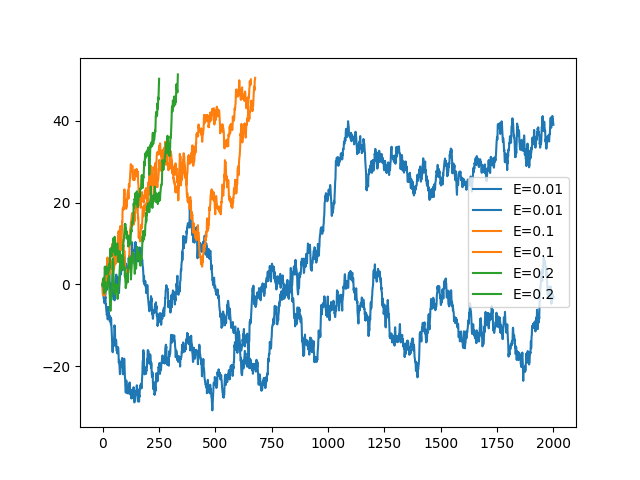

In [62]:
# simulate and plot two trials for each of three evidence levels E
fig, ax = plt.subplots()
E = [.01, .1, .2]
colors = ['tab:blue', 'tab:orange', 'tab:green']
legend_ = ['E=0.01', 'E=0.1', 'E=0.2']

for idx, e in enumerate(E):
    x, max_trial, _ = DDM(E=e, beta=50)
    ax.plot(x, c=colors[idx], label=legend_[idx])
    x, max_trial, _ = DDM(E=e, beta=50)
    ax.plot(x, c=colors[idx], label=legend_[idx])
    
ax.legend()
    

(array([29., 25., 13.,  8.,  4.,  3.,  2.,  0.,  0.,  1.]),
 array([  39. ,  173.8,  308.6,  443.4,  578.2,  713. ,  847.8,  982.6,
        1117.4, 1252.2, 1387. ]),
 <BarContainer object of 10 artists>)

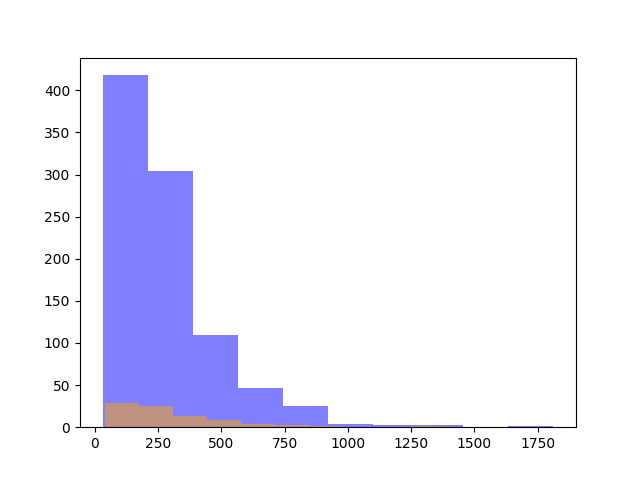

In [70]:
# Simulate 1000 trials with the following parameters: E = 0.06, beta=20.
# Plot the distribution of reaction times separately for correct and error trials.
RTs = []
decisions = []
for trial in np.arange(1000):
    x, max_trial, decision = DDM(E=0.06, beta=20)
    RTs.append(max_trial)
    decisions.append(decision)
    
RTs = np.array(RTs)
decisions = np.array(decisions)

wrong_decs = decisions[decisions==-1]
wrong_RTs = RTs[decisions==-1]

right_decs = decisions[decisions==1]
right_RTs = RTs[decisions==1]



fig1, ax1 = plt.subplots()
ax1.hist(right_RTs, color='blue', alpha=0.5)
ax1.hist(wrong_RTs, color='orange', alpha=0.5)
    

## Problem 2: Speed-accuracy tradeoff ##

Now we will illustrate a fundamental feature of percetual decision-making: the speed-accuracy tradeoff. We will do this by manipulating the decision threshold \\(\beta\\). Intuitively, if you have a higher threshold, a decision variable will take longer to reach it with the same drift rate, but it will also be less likely to reach it accidentally because of diffusion. Let's see how this holds up.

**2a**. Vary \\(\beta\\) between 5 and 65 in steps of 10, using E = 0.1 and c = 2. For each value, simulate 500 trials with your DDM function, recording the accuracy (% correct trials) and the median reaction time. Plot reaction time vs accuracy, where each data point comes from a \\(\\beta\\). Color the different data points along some gradient to easily identify how \\(\beta\\) changes reaction times and accuracy.  <br>


In [ ]:
# Speed - accuracy tradeoff via changing beta
betas = np.arange(5,65,10)